# Strukture Podataka za Seaborn

## Seminarski rad - Seaborn
---

### **Što ćemo naučiti:**

U ovom notebook-u ćemo istražiti **različite strukture podataka** koje Seaborn može da prihvati za kreiranje vizualizacija:

1. **📊 Pandas DataFrame** - glavna struktura podataka
2. **📈 Long vs Wide Format** - ključne razlike
3. **🎯 Dictionary of Arrays** - alternativni format
4. **📋 NumPy Arrays** sa eksplicitnim labeling
5. **🔄 Konverzije između formata** - melt, pivot, stack/unstack
6. **🏗️ Kombinovanje različitih izvora** - merge i join operacije

### **Zašto je ovo važno:**
- Seaborn zahteva **specifične formate** podataka
- **Tidy data** (long format) je preferiran
- Razumevanje formata = lakše kreiranje grafika
- Efficient data reshaping za complex visualizations

---

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Podešavanje
sns.set_theme()
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

# Load sample datasets
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
penguins = sns.load_dataset('penguins').dropna()

print(f"Sample datasets loaded:")
print(f"Tips: {tips.shape}")
print(f"Flights: {flights.shape}")
print(f"Penguins: {penguins.shape}")

Sample datasets loaded:
Tips: (244, 7)
Flights: (144, 3)
Penguins: (333, 7)


## 1. **Pandas DataFrame - Glavna struktura podataka**

**DataFrame** je **najčešći i najprikladniji** format za Seaborn vizualizacije.

### **Karakteristike DataFrame formata:**
- **Strukturisani podaci** sa labeled rows i columns
- **Mixed data types** (numerički, categorical, datetime)
- **Built-in indexing** za easy slicing
- **Metadata support** - column names, data types, etc.

### **Prednosti za Seaborn:**
- **Automatic label detection** - column names postaju axis labels
- **Seamless categorical handling** - kategorije su prirodno podržane
- **Easy data filtering** sa pandas operations
- **Memory efficient** za velike datasets

📊 BASIC DATAFRAME:
   x  y category  size_value
0  1  2        A          20
1  2  5        B          35
2  3  3        A          25
3  4  8        B          40
4  5  7        A          30
5  6  6        B          45
Info o DataFrame:
Shape: (6, 4)
Columns: ['x', 'y', 'category', 'size_value']
Data types:
x              int64
y              int64
category      object
size_value     int64
dtype: object


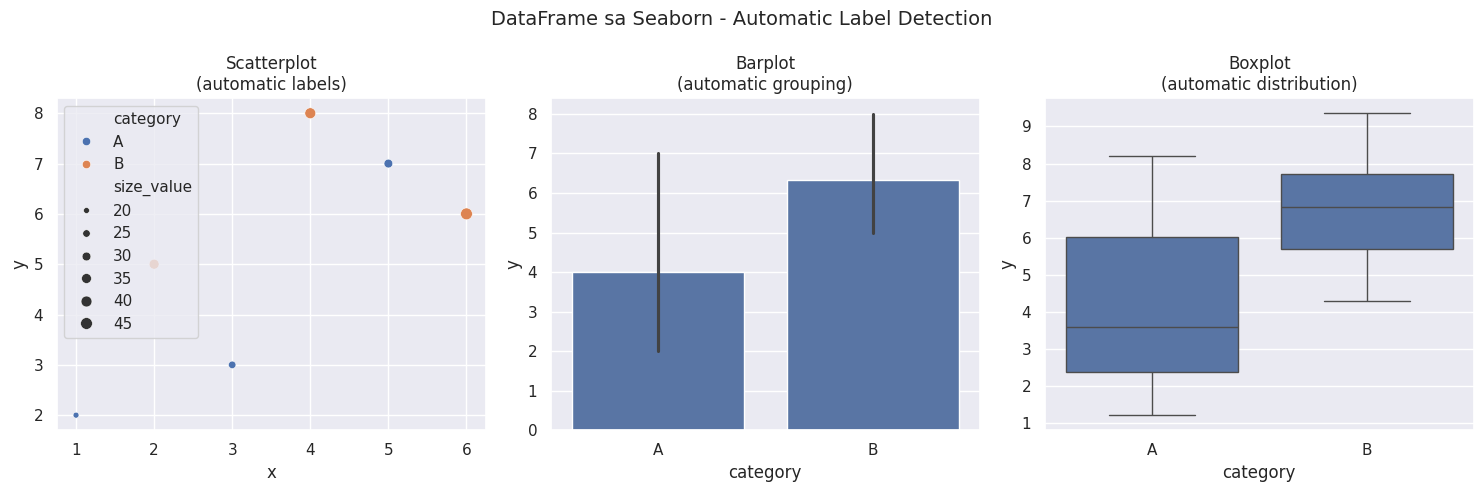


🔍 MIXED DATA TYPES DATAFRAME:
        date  sales region product_category  is_promotion
0 2024-01-31    100  North      Electronics          True
1 2024-02-29    120  South         Clothing         False
2 2024-03-31    110  North      Electronics          True
3 2024-04-30    140  South            Books         False
4 2024-05-31    130  North         Clothing          True

Data types:
date           : datetime64[ns]
sales          : int64
region         : object
product_category: category
is_promotion   : bool


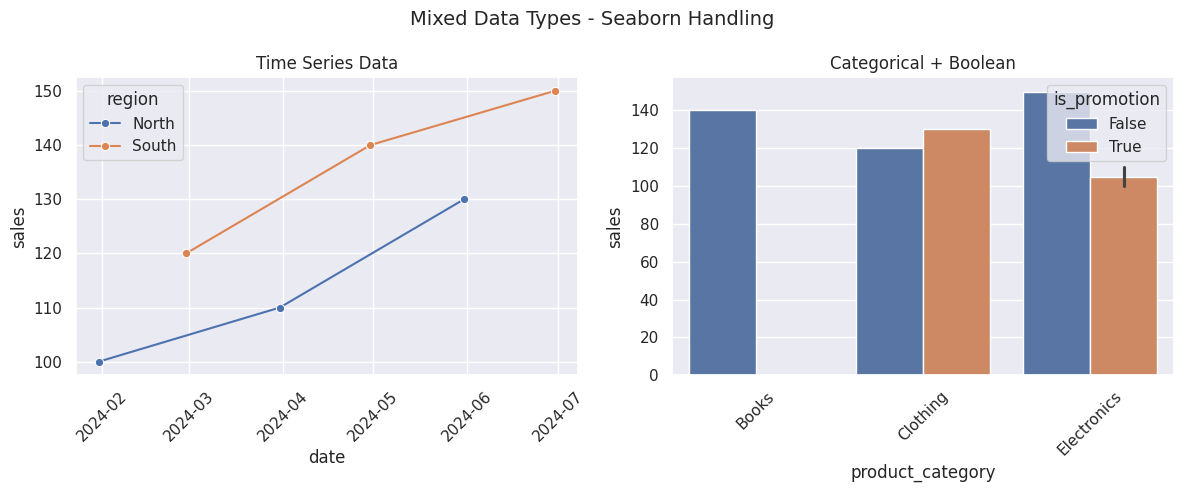

✅ DATAFRAME PREDNOSTI:
- Seaborn automatski koristi column names kao labels
- Mixed data types su prirodno podržani
- Easy filtering i subsetting
- Memory efficient za velike datasets
- Built-in support za missing values


In [14]:
basic_df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5, 6],
    'y': [2, 5, 3, 8, 7, 6],
    'category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'size_value': [20, 35, 25, 40, 30, 45]
})

print("📊 BASIC DATAFRAME:")
print(basic_df)
print(f"Info o DataFrame:")
print(f"Shape: {basic_df.shape}")
print(f"Columns: {list(basic_df.columns)}")
print(f"Data types:\n{basic_df.dtypes}")

# Seaborn automatski koristi DataFrame strukture
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('DataFrame sa Seaborn - Automatic Label Detection', fontsize=14)

# 1. Scatter plot - automatski detektuje labels
sns.scatterplot(data=basic_df, x='x', y='y', hue='category', size='size_value', ax=axes[0])
axes[0].set_title('Scatterplot\n(automatic labels)')

# 2. Bar plot
sns.barplot(data=basic_df, x='category', y='y', ax=axes[1])
axes[1].set_title('Barplot\n(automatic grouping)')

# 3. Box plot
expanded_df = pd.concat([basic_df] * 10)  # Više podataka za box plot
expanded_df['y'] += np.random.normal(0, 1, len(expanded_df))  # Dodaj noise
sns.boxplot(data=expanded_df, x='category', y='y', ax=axes[2])
axes[2].set_title('Boxplot\n(automatic distribution)')

plt.tight_layout()
plt.show()

# Demonstracija različitih data types
mixed_df = pd.DataFrame({
    'date': pd.date_range('2024-01-01', periods=6, freq='M'),
    'sales': [100, 120, 110, 140, 130, 150],
    'region': ['North', 'South', 'North', 'South', 'North', 'South'],
    'product_category': pd.Categorical(['Electronics', 'Clothing', 'Electronics', 
                                     'Books', 'Clothing', 'Electronics']),
    'is_promotion': [True, False, True, False, True, False]
})

print(f"\n🔍 MIXED DATA TYPES DATAFRAME:")
print(mixed_df.head())
print(f"\nData types:")
for col in mixed_df.columns:
    print(f"{col:15}: {mixed_df[col].dtype}")

# Seaborn handles mixed data types seamlessly
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Mixed Data Types - Seaborn Handling', fontsize=14)

# Date on x-axis
sns.lineplot(data=mixed_df, x='date', y='sales', hue='region', marker='o', ax=axes[0])
axes[0].set_title('Time Series Data')
axes[0].tick_params(axis='x', rotation=45)

# Categorical data
sns.barplot(data=mixed_df, x='product_category', y='sales', hue='is_promotion', ax=axes[1])
axes[1].set_title('Categorical + Boolean')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ DATAFRAME PREDNOSTI:")
print("- Seaborn automatski koristi column names kao labels")
print("- Mixed data types su prirodno podržani")
print("- Easy filtering i subsetting")
print("- Memory efficient za velike datasets")
print("- Built-in support za missing values")

## 2. **Long vs Wide Format - Ključna razlika**

**Format podataka** drastično utiče na to kako Seaborn kreira vizualizacije.

### **Wide Format (Širok format):**
- **Svaka varijabla ima svoju kolonu**
- **Multiple measures** kroz different columns
- **Good for spreadsheets**, loš za Seaborn
- **Primer**: `Sales_2023`, `Sales_2024` kao separate columns

### **Long Format (Dugačak format) - "Tidy Data":**
- **Svaka observacija je jedan red**
- **Single measure column** sa identifier columns
- **Seaborn preferira ovaj format**
- **Primer**: `Year`, `Sales` columns umesto `Sales_2023`, `Sales_2024`

### **Zašto Seaborn voli Long Format:**
- **Easy grouping** sa `hue`, `style`, `col` parametrima
- **Natural categorical handling**
- **Consistent API** kroz sve plot types
- **Statistical operations** su lakše

📊 WIDE FORMAT (Spreadsheet style):
  Month  Sales_2023  Sales_2024  Profit_2023  Profit_2024
0   Jan         100         105           20           21
1   Feb         120         125           24           25
2   Mar         110         115           22           23
3   Apr         140         145           28           29
4   May         130         135           26           27
5   Jun         150         160           30           32
📈 LONG FORMAT (Tidy data):
   Month  Year  Sales  Profit
0    Jan  2023    100      20
1    Feb  2023    120      24
2    Mar  2023    110      22
3    Apr  2023    140      28
4    May  2023    130      26
5    Jun  2023    150      30
6    Jan  2024    105      21
7    Feb  2024    125      25
8    Mar  2024    115      23
9    Apr  2024    145      29
10   May  2024    135      27
11   Jun  2024    160      32

Shape comparison:
Wide format: (6, 5)
Long format: (12, 4)


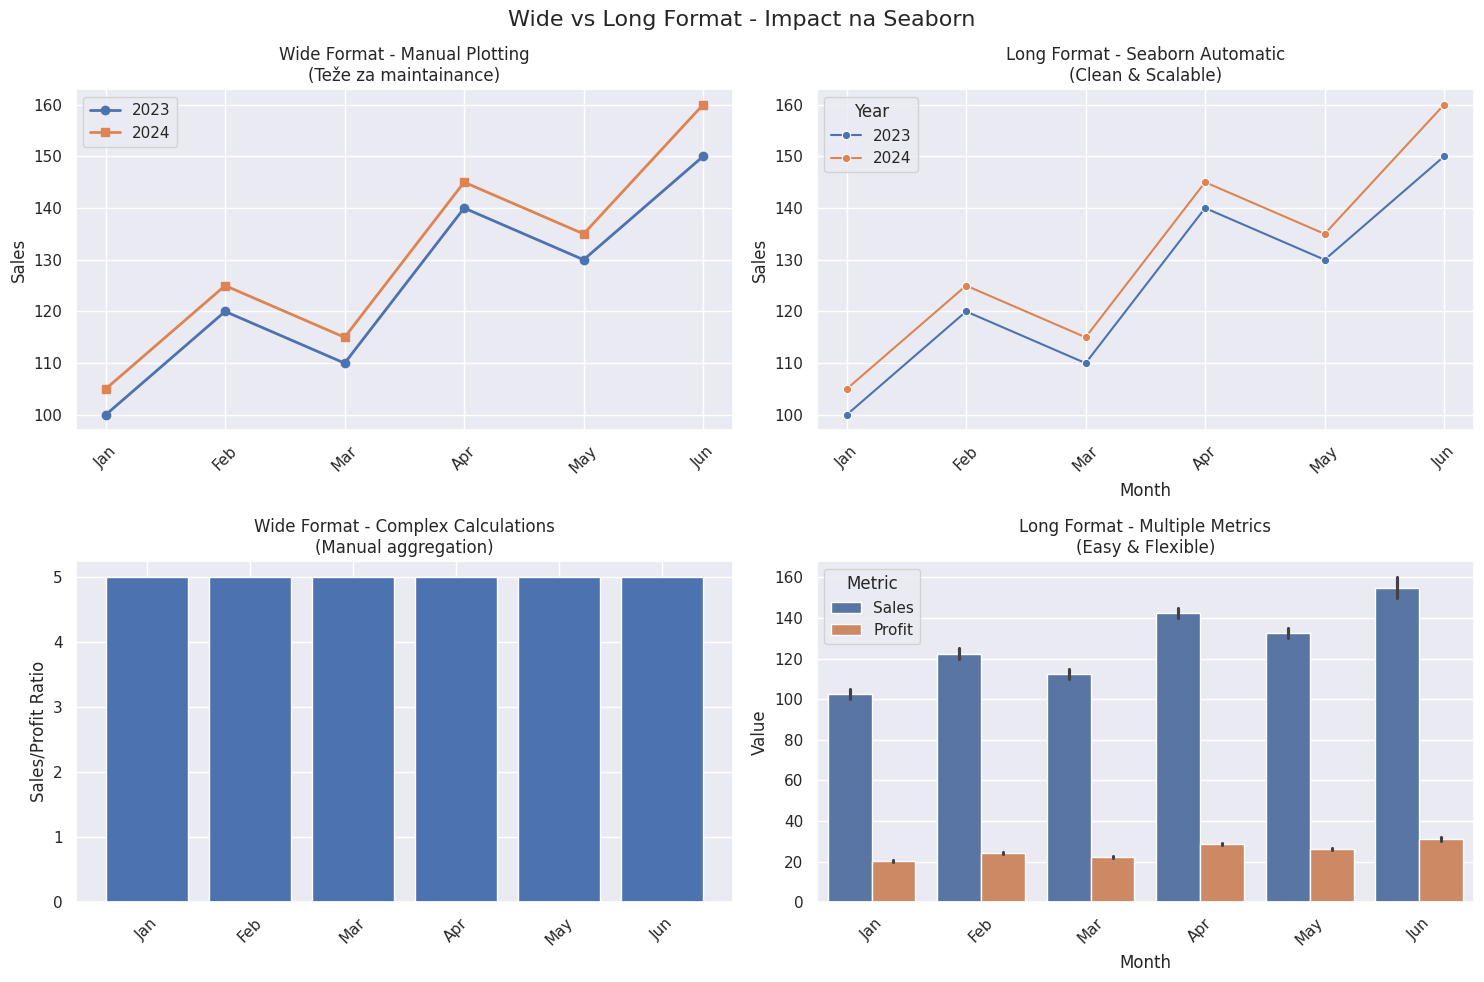


🏢 COMPLEX BUSINESS DATA:
Wide format (spreadsheet style):
  Region  Laptop_Q1  Laptop_Q2  Laptop_Q3  Laptop_Q4  Phone_Q1  Phone_Q2  \
0  North         88         67         73         93       103        91   
1  South         78         80         77        122        82       119   
2   East         64         98         65        105       101       127   
3   West         92        117         65        109       132        91   

   Phone_Q3  Phone_Q4  
0       148       157  
1       144       121  
2       105       148  
3       117       158  

Long format (tidy data):
  Region Product Quarter  Sales
0  North  Laptop      Q1     88
1  South  Laptop      Q1     78
2   East  Laptop      Q1     64
3   West  Laptop      Q1     92
4  North  Laptop      Q2     67
5  South  Laptop      Q2     80
6   East  Laptop      Q2     98
7   West  Laptop      Q2    117


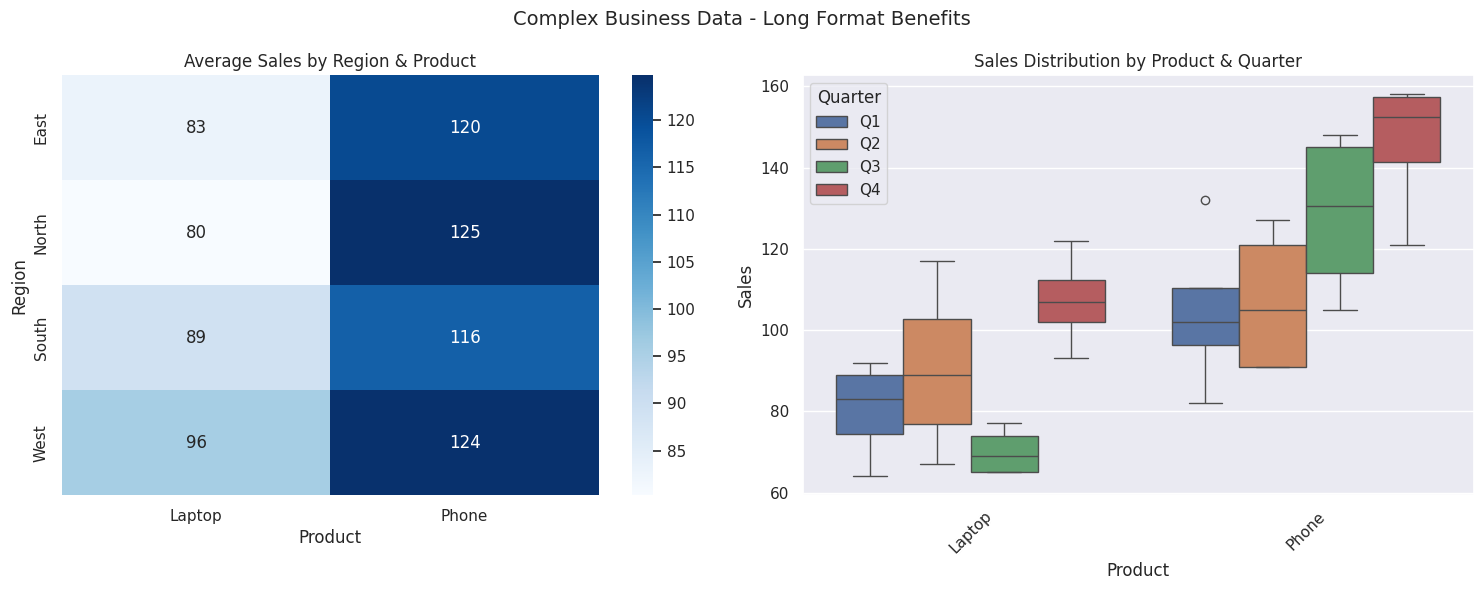

💡 LONG FORMAT PREDNOSTI:
- Jedan sns.lineplot() call umesto multiple plot() calls
- Automatic legend generation
- Easy adding new categories (godine, products, etc.)
- Statistical operations su prirodne
- Consistent API kroz sve Seaborn funkcije
❌ WIDE FORMAT PROBLEMI:
- Manual plotting za svaku kolonu
- Hard to scale sa više kategorija
- Complex legend management
- Repetitive code
- Doesn't work sa Seaborn's hue, style, col parametrima


In [15]:
# WIDE FORMAT PRIMER
wide_sales = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Sales_2023': [100, 120, 110, 140, 130, 150],
    'Sales_2024': [105, 125, 115, 145, 135, 160],
    'Profit_2023': [20, 24, 22, 28, 26, 30],
    'Profit_2024': [21, 25, 23, 29, 27, 32]
})

print("📊 WIDE FORMAT (Spreadsheet style):")
print(wide_sales)

# LONG FORMAT KONVERZIJA
# Melt za Sales
long_sales = wide_sales.melt(
    id_vars=['Month'], 
    value_vars=['Sales_2023', 'Sales_2024'],
    var_name='Year', 
    value_name='Sales'
)

# Clean up year column
long_sales['Year'] = long_sales['Year'].str.replace('Sales_', '')

# Melt za Profit
long_profit = wide_sales.melt(
    id_vars=['Month'], 
    value_vars=['Profit_2023', 'Profit_2024'],
    var_name='Year', 
    value_name='Profit'
)
long_profit['Year'] = long_profit['Year'].str.replace('Profit_', '')

# Combine Sales i Profit u single long format
long_combined = pd.merge(long_sales, long_profit, on=['Month', 'Year'])

print(f"📈 LONG FORMAT (Tidy data):")
print(long_combined)

print(f"\nShape comparison:")
print(f"Wide format: {wide_sales.shape}")
print(f"Long format: {long_combined.shape}")

# Vizualizacija razlika
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Wide vs Long Format - Impact na Seaborn', fontsize=16)

# 1. WIDE FORMAT - problematično za Seaborn
# Moramo manually specify svaki year
axes[0,0].plot(wide_sales['Month'], wide_sales['Sales_2023'], 'o-', label='2023', linewidth=2)
axes[0,0].plot(wide_sales['Month'], wide_sales['Sales_2024'], 's-', label='2024', linewidth=2)
axes[0,0].set_title('Wide Format - Manual Plotting\n(Teže za maintainance)')
axes[0,0].legend()
axes[0,0].set_ylabel('Sales')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. LONG FORMAT - elegantno sa Seaborn
sns.lineplot(data=long_combined, x='Month', y='Sales', hue='Year', marker='o', ax=axes[0,1])
axes[0,1].set_title('Long Format - Seaborn Automatic\n(Clean & Scalable)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. WIDE FORMAT - multiple metrics problematično
# Ne možemo lako kombinovati Sales i Profit
sales_profit_ratio = wide_sales[['Sales_2023', 'Sales_2024']].mean(axis=1) / wide_sales[['Profit_2023', 'Profit_2024']].mean(axis=1)
axes[1,0].bar(wide_sales['Month'], sales_profit_ratio)
axes[1,0].set_title('Wide Format - Complex Calculations\n(Manual aggregation)')
axes[1,0].set_ylabel('Sales/Profit Ratio')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. LONG FORMAT - multiple metrics elegantno
long_melted = long_combined.melt(id_vars=['Month', 'Year'], 
                                value_vars=['Sales', 'Profit'],
                                var_name='Metric', value_name='Value')
sns.barplot(data=long_melted, x='Month', y='Value', hue='Metric', ax=axes[1,1])
axes[1,1].set_title('Long Format - Multiple Metrics\n(Easy & Flexible)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Više complex primer - simulacija business data
np.random.seed(42)
products = ['Laptop', 'Phone', 'Tablet']
regions = ['North', 'South', 'East', 'West']
months = ['Q1', 'Q2', 'Q3', 'Q4']

# WIDE FORMAT business data
wide_business = pd.DataFrame({
    'Region': regions,
    'Laptop_Q1': np.random.randint(50, 100, 4),
    'Laptop_Q2': np.random.randint(60, 120, 4),
    'Laptop_Q3': np.random.randint(55, 110, 4),
    'Laptop_Q4': np.random.randint(70, 130, 4),
    'Phone_Q1': np.random.randint(80, 150, 4),
    'Phone_Q2': np.random.randint(90, 160, 4),
    'Phone_Q3': np.random.randint(85, 155, 4),
    'Phone_Q4': np.random.randint(100, 170, 4),
})

print(f"\n🏢 COMPLEX BUSINESS DATA:")
print("Wide format (spreadsheet style):")
print(wide_business)

# Konverzija u LONG FORMAT
long_business = wide_business.melt(id_vars=['Region'], var_name='Product_Quarter', value_name='Sales')
long_business[['Product', 'Quarter']] = long_business['Product_Quarter'].str.split('_', expand=True)
long_business = long_business.drop('Product_Quarter', axis=1)
long_business = long_business[['Region', 'Product', 'Quarter', 'Sales']]

print(f"\nLong format (tidy data):")
print(long_business.head(8))

# Seaborn vizualizacija sa long format
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Complex Business Data - Long Format Benefits', fontsize=14)

# Heatmap
business_pivot = long_business.pivot_table(values='Sales', index='Region', columns='Product', aggfunc='mean')
sns.heatmap(business_pivot, annot=True, fmt='.0f', cmap='Blues', ax=axes[0])
axes[0].set_title('Average Sales by Region & Product')

# Multi-dimensional analysis
sns.boxplot(data=long_business, x='Product', y='Sales', hue='Quarter', ax=axes[1])
axes[1].set_title('Sales Distribution by Product & Quarter')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"💡 LONG FORMAT PREDNOSTI:")
print(f"- Jedan sns.lineplot() call umesto multiple plot() calls")
print(f"- Automatic legend generation")
print(f"- Easy adding new categories (godine, products, etc.)")
print(f"- Statistical operations su prirodne")
print(f"- Consistent API kroz sve Seaborn funkcije")

print(f"❌ WIDE FORMAT PROBLEMI:")
print(f"- Manual plotting za svaku kolonu")
print(f"- Hard to scale sa više kategorija")
print(f"- Complex legend management")
print(f"- Repetitive code")
print(f"- Doesn't work sa Seaborn's hue, style, col parametrima")

## 3. **Dictionary of Arrays - Alternativni format**

**Dictionary of arrays** je **drugi najčešći format** za Seaborn nakon DataFrame.

### **Kada koristiti Dict format:**
- **Quick prototyping** - brže od DataFrame creation
- **NumPy arrays** kao input
- **Small datasets** gde DataFrame je overkill
- **Memory conscious** aplikacije

### **Format strukture:**
```python
data = {
    'x': [1, 2, 3, 4],          # Liste ili NumPy arrays
    'y': [10, 20, 15, 25],
    'category': ['A', 'B', 'A', 'B']
}
```

### **Ograničenja:**
- **Nema built-in data types** - sve je generic
- **No missing value handling** kao DataFrame
- **Limited metadata** - no column dtypes, indexes
- **Manje fleksibilnosti** za complex operations

📋 DICTIONARY OF ARRAYS:
Structure:
  x: [1, 2, 3, 4]... (length: 8)
  y: [2, 5, 3, 8]... (length: 8)
  category: ['A', 'B', 'A', 'B']... (length: 8)
  size: [20, 35, 25, 40]... (length: 8)

🔢 NUMPY ARRAYS u DICTIONARY:
x shape: (100,), dtype: float64
y shape: (100,), dtype: float64
group unique values: ['Group1' 'Group2' 'Group3']

⚡ PERFORMANCE COMPARISON:
Dictionary creation (1000x): 0.0054s
DataFrame creation (1000x): 0.6406s
Dictionary je 117.8x brži za creation
Dictionary creation (1000x): 0.0054s
DataFrame creation (1000x): 0.6406s
Dictionary je 117.8x brži za creation


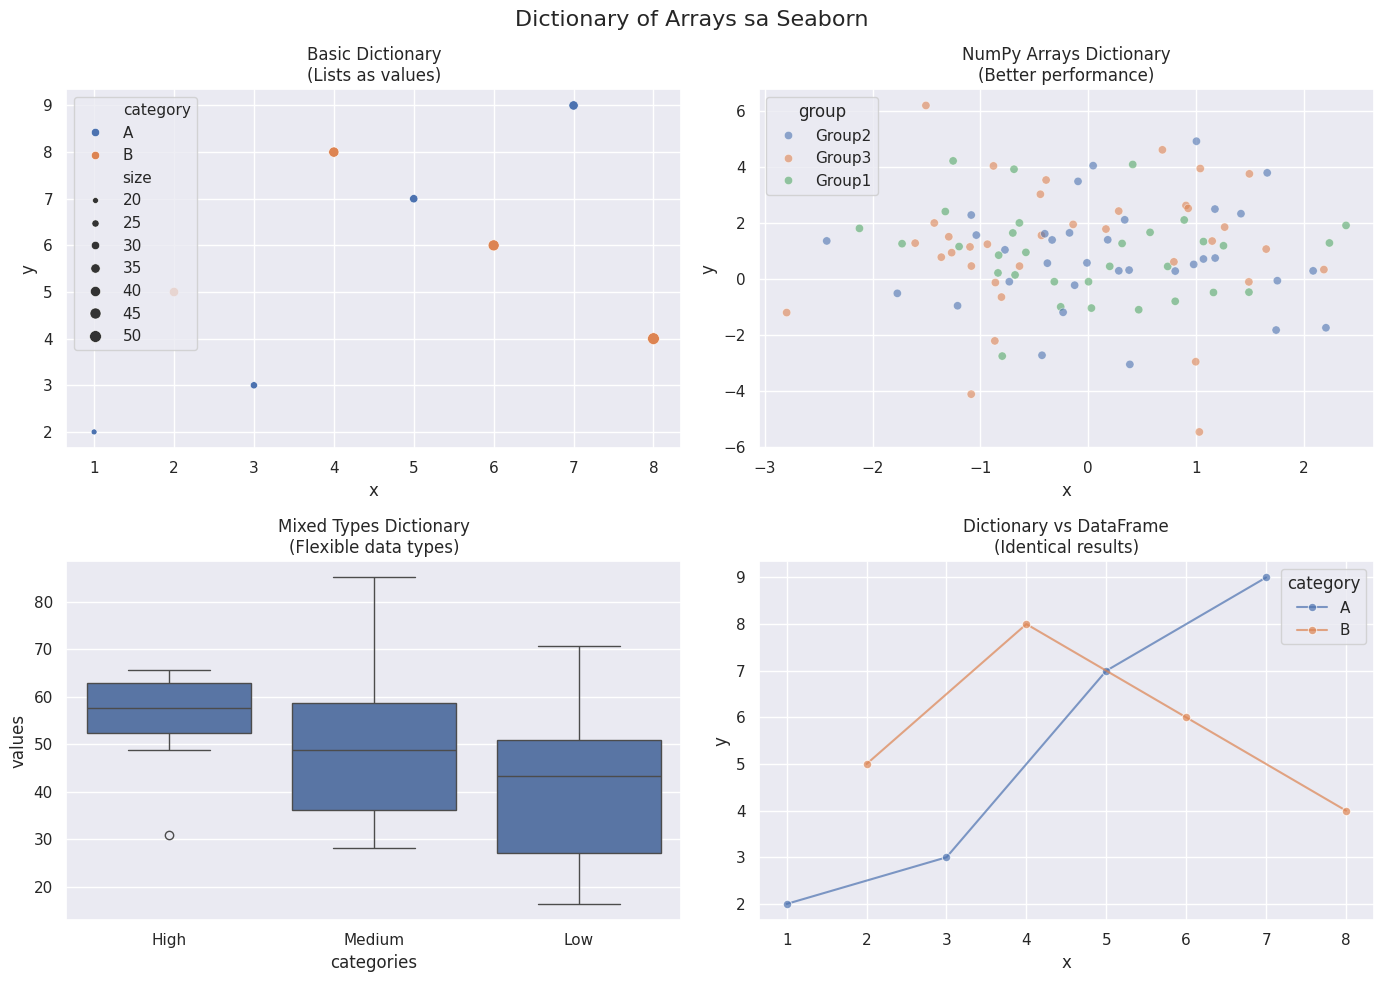


🌡️ TIME SERIES DICTIONARY:
Sample data:
timestamp: [Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-02 00:00:00'), Timestamp('2024-01-03 00:00:00')]...
temperature: [21.10490996 23.05661118 21.98447318]...
humidity: [88.70467123 74.53198045 71.009145  ]...
location: ['Station_A', 'Station_B', 'Station_A']...


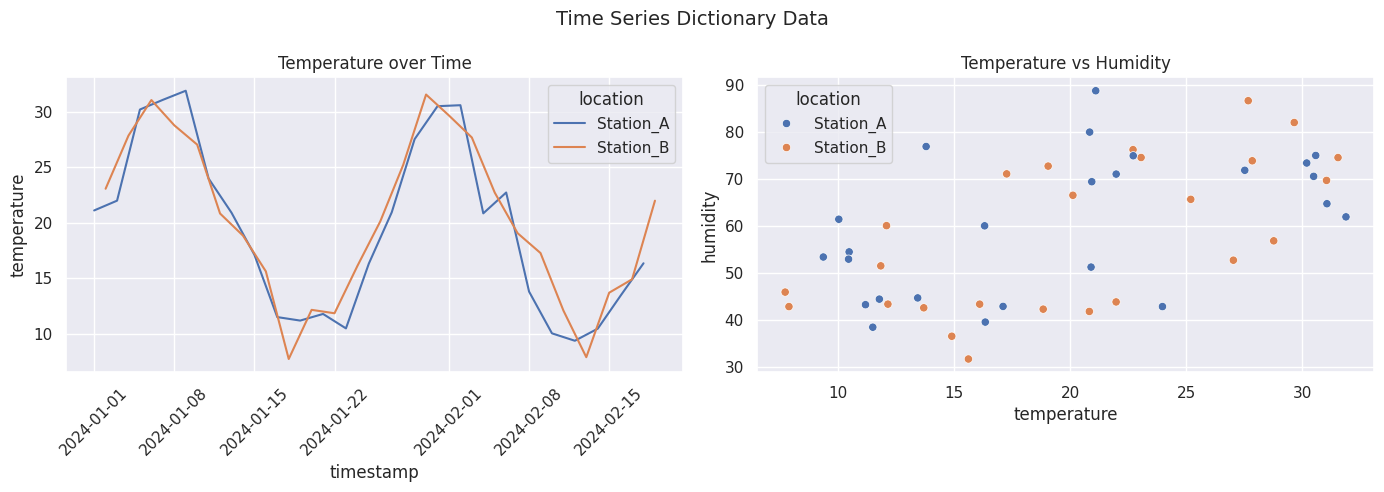


✅ DICTIONARY FORMAT PREDNOSTI:
- Brže kreiranje za small datasets
- Direct NumPy array support
- Memory efficient
- Simple struktura
- Good za prototyping

❌ DICTIONARY FORMAT OGRANIČENJA:
- Nema automatic data type detection
- No built-in missing value handling
- Limited metadata storage
- Manje intuitivno za complex operations
- No indexing capabilities

🤔 KADA KORISTITI:
✓ Quick prototyping sa malim datasets
✓ NumPy arrays kao primary data
✓ Performance-critical aplikacije
✓ Simple data strukture
✗ Complex data manipulation
✗ Large datasets sa metadata
✗ Missing value handling potreban


In [16]:
# DICTIONARY OF ARRAYS primeri
np.random.seed(123)

# 1. Basic Dictionary format
dict_data = {
    'x': [1, 2, 3, 4, 5, 6, 7, 8],
    'y': [2, 5, 3, 8, 7, 6, 9, 4],
    'category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'size': [20, 35, 25, 40, 30, 45, 35, 50]
}

print("📋 DICTIONARY OF ARRAYS:")
print("Structure:")
for key, value in dict_data.items():
    print(f"  {key}: {value[:4]}... (length: {len(value)})")

# 2. NumPy arrays u dictionary
numpy_dict = {
    'x': np.random.randn(100),
    'y': np.random.randn(100) * 2 + 1,
    'group': np.random.choice(['Group1', 'Group2', 'Group3'], 100)
}

print(f"\n🔢 NUMPY ARRAYS u DICTIONARY:")
print(f"x shape: {numpy_dict['x'].shape}, dtype: {numpy_dict['x'].dtype}")
print(f"y shape: {numpy_dict['y'].shape}, dtype: {numpy_dict['y'].dtype}")
print(f"group unique values: {np.unique(numpy_dict['group'])}")

# 3. Mixed types u dictionary
mixed_dict = {
    'values': np.random.normal(50, 15, 60),
    'categories': ['High', 'Medium', 'Low'] * 20,
    'dates': pd.date_range('2024-01-01', periods=60, freq='D').tolist(),
    'boolean_flag': [True, False] * 30
}

# Poređenje Dictionary vs DataFrame
print(f"\n⚡ PERFORMANCE COMPARISON:")

# Time creation
import time

# Dictionary creation
start = time.time()
for _ in range(1000):
    temp_dict = {
        'x': list(range(100)),
        'y': list(range(100, 200)),
        'cat': ['A', 'B'] * 50
    }
dict_time = time.time() - start

# DataFrame creation
start = time.time()
for _ in range(1000):
    temp_df = pd.DataFrame({
        'x': list(range(100)),
        'y': list(range(100, 200)),
        'cat': ['A', 'B'] * 50
    })
df_time = time.time() - start

print(f"Dictionary creation (1000x): {dict_time:.4f}s")
print(f"DataFrame creation (1000x): {df_time:.4f}s")
print(f"Dictionary je {df_time/dict_time:.1f}x brži za creation")

# Vizualizacija sa različitim formatima
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Dictionary of Arrays sa Seaborn', fontsize=16)

# 1. Basic dictionary
sns.scatterplot(data=dict_data, x='x', y='y', hue='category', size='size', ax=axes[0,0])
axes[0,0].set_title('Basic Dictionary\n(Lists as values)')

# 2. NumPy arrays dictionary
sns.scatterplot(data=numpy_dict, x='x', y='y', hue='group', alpha=0.6, ax=axes[0,1])
axes[0,1].set_title('NumPy Arrays Dictionary\n(Better performance)')

# 3. Mixed types dictionary
sample_mixed = {k: v[:30] for k, v in mixed_dict.items()}  # Sample za viz
sns.boxplot(data=sample_mixed, x='categories', y='values', ax=axes[1,0])
axes[1,0].set_title('Mixed Types Dictionary\n(Flexible data types)')

# 4. Comparison: Dictionary vs DataFrame (isti plot)
df_equivalent = pd.DataFrame(dict_data)
sns.lineplot(data=dict_data, x='x', y='y', hue='category', marker='o', ax=axes[1,1], alpha=0.7)
axes[1,1].set_title('Dictionary vs DataFrame\n(Identical results)')

plt.tight_layout()
plt.show()

# Advanced dictionary example - time series
time_series_dict = {
    'timestamp': pd.date_range('2024-01-01', periods=50, freq='D'),
    'temperature': 20 + 10 * np.sin(np.linspace(0, 4*np.pi, 50)) + np.random.normal(0, 2, 50),
    'humidity': 60 + 20 * np.cos(np.linspace(0, 3*np.pi, 50)) + np.random.normal(0, 5, 50),
    'location': ['Station_A', 'Station_B'] * 25
}

print(f"\n🌡️ TIME SERIES DICTIONARY:")
print("Sample data:")
for key in time_series_dict:
    if key == 'timestamp':
        print(f"{key}: {time_series_dict[key][:3].tolist()}...")
    else:
        print(f"{key}: {time_series_dict[key][:3]}...")

# Time series visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Time Series Dictionary Data', fontsize=14)

sns.lineplot(data=time_series_dict, x='timestamp', y='temperature', hue='location', ax=axes[0])
axes[0].set_title('Temperature over Time')
axes[0].tick_params(axis='x', rotation=45)

sns.scatterplot(data=time_series_dict, x='temperature', y='humidity', hue='location', ax=axes[1])
axes[1].set_title('Temperature vs Humidity')

plt.tight_layout()
plt.show()

print(f"\n✅ DICTIONARY FORMAT PREDNOSTI:")
print(f"- Brže kreiranje za small datasets")
print(f"- Direct NumPy array support")
print(f"- Memory efficient")
print(f"- Simple struktura")
print(f"- Good za prototyping")

print(f"\n❌ DICTIONARY FORMAT OGRANIČENJA:")
print(f"- Nema automatic data type detection")
print(f"- No built-in missing value handling")
print(f"- Limited metadata storage")
print(f"- Manje intuitivno za complex operations")
print(f"- No indexing capabilities")

print(f"\n🤔 KADA KORISTITI:")
print(f"✓ Quick prototyping sa malim datasets")
print(f"✓ NumPy arrays kao primary data")
print(f"✓ Performance-critical aplikacije") 
print(f"✓ Simple data strukture")
print(f"✗ Complex data manipulation")
print(f"✗ Large datasets sa metadata")
print(f"✗ Missing value handling potreban")

## 4. **Konverzije između formata - Melt, Pivot, Stack/Unstack**

**Data reshaping** je ključna veština za pripremu podataka za Seaborn. 

### **Glavne transformacije:**

| **Operacija** | **Od** | **Do** | **Kada koristiti** |
|---------------|--------|--------|-------------------|
| **`melt()`** | Wide → Long | Tidy data | Za Seaborn vizualizacije |
| **`pivot()`** | Long → Wide | Cross-tabulation | Za heatmaps, wide analysis |
| **`stack()`** | Wide → Long | MultiIndex result | Complex hierarchical data |
| **`unstack()`** | Long → Wide | Index → Columns | Pivot alternative |

### **Ključne funkcije:**
- **`pd.melt()`** - wide to long conversion
- **`df.pivot()`** / **`pd.pivot_table()`** - long to wide
- **`df.stack()`** / **`df.unstack()`** - index/column manipulation
- **`pd.concat()`** - combining multiple datasets

📊 ORIGINAL WIDE FORMAT:
   Product  Q1_2023  Q2_2023  Q3_2023  Q4_2023  Q1_2024  Q2_2024
0   Laptop      150      160      140      180      170      185
1    Phone      200      210      190      250      220      240
2   Tablet      100      110       95      130      120      125
3  Desktop       80       85       75       95       90      100
4  Monitor      120      130      115      140      135      145
Shape: (5, 7)

🔄 MELT TRANSFORMACIJA (Wide → Long):
After basic melt:
   Product Quarter_Year  Sales
0   Laptop      Q1_2023    150
1    Phone      Q1_2023    200
2   Tablet      Q1_2023    100
3  Desktop      Q1_2023     80
4  Monitor      Q1_2023    120
5   Laptop      Q2_2023    160
6    Phone      Q2_2023    210
7   Tablet      Q2_2023    110
Shape: (30, 3)

After splitting columns:
   Product  Year Quarter  Sales
0   Laptop  2023      Q1    150
1    Phone  2023      Q1    200
2   Tablet  2023      Q1    100
3  Desktop  2023      Q1     80
4  Monitor  2023      Q1    120
5   

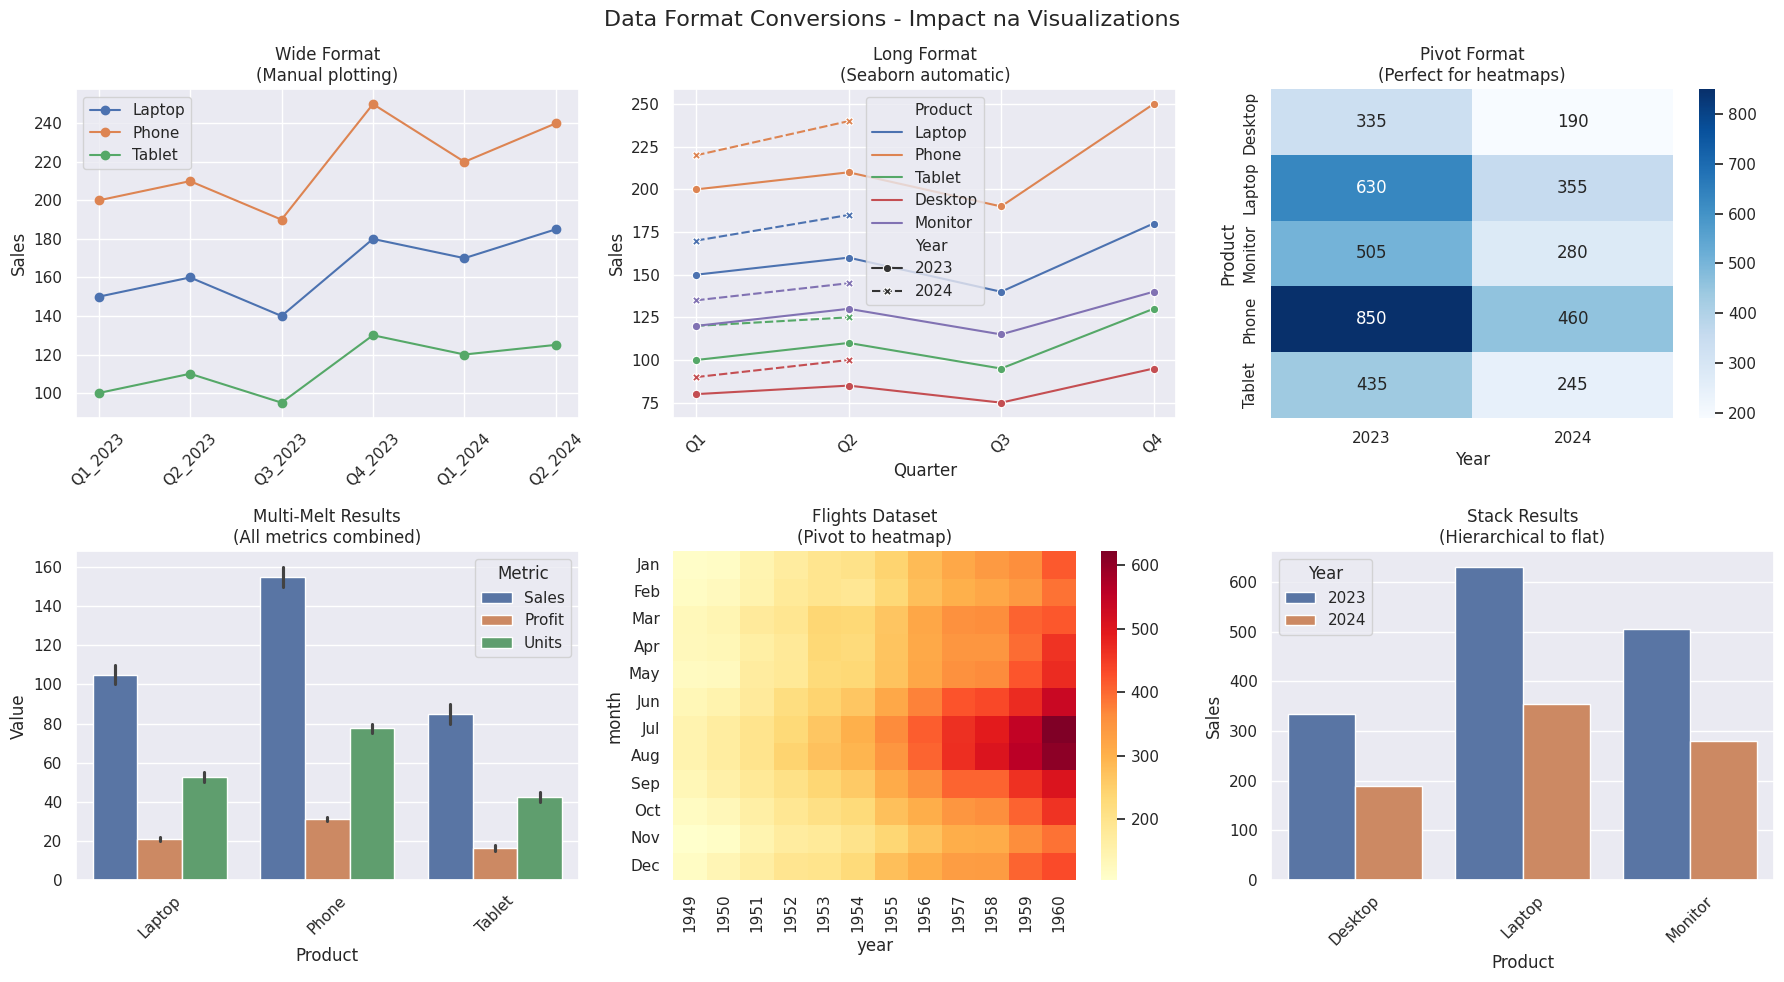


⚡ TRANSFORMATION PERFORMANCE:
Melt operation (1000x20): 0.0075s
Pivot operation (20000 rows): 0.0201s

💡 TRANSFORMATION GUIDELINES:
✓ Koristi melt() za pripremu podataka za Seaborn
✓ Koristi pivot() za heatmaps i cross-tabulation
✓ Koristi stack/unstack za MultiIndex operations
✓ Planiraj transformacije u advance za bolje performance

📋 TRANSFORMATION CHEAT SHEET:
Wide → Long:  df.melt(id_vars=[], value_vars=[])
Long → Wide:  df.pivot_table(values='', index='', columns='')
Columns → Index: df.stack()
Index → Columns: df.unstack()


In [17]:
quarterly_sales = pd.DataFrame({
    'Product': ['Laptop', 'Phone', 'Tablet', 'Desktop', 'Monitor'],
    'Q1_2023': [150, 200, 100, 80, 120],
    'Q2_2023': [160, 210, 110, 85, 130],
    'Q3_2023': [140, 190, 95, 75, 115],
    'Q4_2023': [180, 250, 130, 95, 140],
    'Q1_2024': [170, 220, 120, 90, 135],
    'Q2_2024': [185, 240, 125, 100, 145]
})

print("📊 ORIGINAL WIDE FORMAT:")
print(quarterly_sales)
print(f"Shape: {quarterly_sales.shape}")

# 1. MELT - Wide to Long conversion
print(f"\n🔄 MELT TRANSFORMACIJA (Wide → Long):")

# Basic melt
long_sales = quarterly_sales.melt(
    id_vars=['Product'],
    var_name='Quarter_Year',
    value_name='Sales'
)

print("After basic melt:")
print(long_sales.head(8))
print(f"Shape: {long_sales.shape}")

# Advanced melt - splitting compound column names
long_sales_clean = quarterly_sales.melt(
    id_vars=['Product'],
    var_name='Quarter_Year',
    value_name='Sales'
)

# Split Quarter_Year into separate columns
long_sales_clean[['Quarter', 'Year']] = long_sales_clean['Quarter_Year'].str.split('_', expand=True)
long_sales_clean = long_sales_clean.drop('Quarter_Year', axis=1)
long_sales_clean = long_sales_clean[['Product', 'Year', 'Quarter', 'Sales']]

print(f"\nAfter splitting columns:")
print(long_sales_clean.head(8))

# 2. PIVOT - Long to Wide conversion
print(f"\n🔄 PIVOT TRANSFORMACIJA (Long → Wide):")

# Basic pivot
pivot_by_year = long_sales_clean.pivot_table(
    values='Sales',
    index='Product',
    columns='Year',
    aggfunc='sum'
)

print("Pivot by Year:")
print(pivot_by_year)

# Multi-column pivot
pivot_multi = long_sales_clean.pivot_table(
    values='Sales',
    index='Product',
    columns=['Year', 'Quarter'],
    aggfunc='mean'
)

print(f"\nMulti-column pivot (first 3 columns):")
print(pivot_multi.iloc[:, :3])

# 3. STACK/UNSTACK operations
print(f"\n🔄 STACK/UNSTACK TRANSFORMACIJE:")

# Stack - columns to index (wide to long)
stacked = pivot_by_year.stack()
print("After stack (wide to long):")
print(stacked.head(8))
print(f"Type: {type(stacked)}")

# Unstack - index to columns (long to wide)  
unstacked = stacked.unstack()
print(f"\nAfter unstack (long to wide):")
print(unstacked)

# Vizualizacija različitih formata
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Data Format Conversions - Impact na Visualizations', fontsize=16)

# 1. Wide format - težak za Seaborn
# Manual plotting jer wide format nije seaborn-friendly
quarters = ['Q1_2023', 'Q2_2023', 'Q3_2023', 'Q4_2023', 'Q1_2024', 'Q2_2024']
for idx, product in enumerate(quarterly_sales['Product'][:3]):  # Samo prvih 3
    values = quarterly_sales[quarterly_sales['Product'] == product][quarters].values[0]
    axes[0,0].plot(range(len(quarters)), values, marker='o', label=product)
axes[0,0].set_title('Wide Format\n(Manual plotting)')
axes[0,0].set_xticks(range(len(quarters)))
axes[0,0].set_xticklabels(quarters, rotation=45)
axes[0,0].legend()
axes[0,0].set_ylabel('Sales')

# 2. Long format - prirodno za Seaborn
sns.lineplot(data=long_sales_clean, x='Quarter', y='Sales', hue='Product', 
             style='Year', markers=True, ax=axes[0,1])
axes[0,1].set_title('Long Format\n(Seaborn automatic)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Pivot heatmap
sns.heatmap(pivot_by_year, annot=True, fmt='.0f', cmap='Blues', ax=axes[0,2])
axes[0,2].set_title('Pivot Format\n(Perfect for heatmaps)')

# 4. Advanced: Multiple melts
# Kreiranje complex dataset sa multiple measures
complex_wide = pd.DataFrame({
    'Product': ['Laptop', 'Phone', 'Tablet'],
    'Sales_Q1': [100, 150, 80],
    'Sales_Q2': [110, 160, 90],
    'Profit_Q1': [20, 30, 15],
    'Profit_Q2': [22, 32, 18],
    'Units_Q1': [50, 75, 40],
    'Units_Q2': [55, 80, 45]
})

# Multiple melt operations
sales_long = complex_wide.melt(id_vars=['Product'], 
                              value_vars=['Sales_Q1', 'Sales_Q2'],
                              var_name='Metric_Quarter', value_name='Value')
sales_long[['Metric', 'Quarter']] = sales_long['Metric_Quarter'].str.split('_', expand=True)
sales_long = sales_long.drop('Metric_Quarter', axis=1)

profit_long = complex_wide.melt(id_vars=['Product'], 
                               value_vars=['Profit_Q1', 'Profit_Q2'],
                               var_name='Metric_Quarter', value_name='Value')
profit_long[['Metric', 'Quarter']] = profit_long['Metric_Quarter'].str.split('_', expand=True)
profit_long = profit_long.drop('Metric_Quarter', axis=1)

units_long = complex_wide.melt(id_vars=['Product'], 
                              value_vars=['Units_Q1', 'Units_Q2'],
                              var_name='Metric_Quarter', value_name='Value')
units_long[['Metric', 'Quarter']] = units_long['Metric_Quarter'].str.split('_', expand=True)
units_long = units_long.drop('Metric_Quarter', axis=1)

# Combine all metrics
all_metrics_long = pd.concat([sales_long, profit_long, units_long], ignore_index=True)

print(f"\n📈 COMPLEX MULTI-MELT RESULTS:")
print(all_metrics_long.head(6))

# Visualize complex transformations
sns.barplot(data=all_metrics_long, x='Product', y='Value', hue='Metric', ax=axes[1,0])
axes[1,0].set_title('Multi-Melt Results\n(All metrics combined)')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Real-world example: flights dataset transformation
flights_pivot = flights.pivot_table(values='passengers', index='month', columns='year', aggfunc='mean')
sns.heatmap(flights_pivot, cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Flights Dataset\n(Pivot to heatmap)')

# 6. Stack/unstack visualization
sample_stack = pivot_by_year.iloc[:3].stack().reset_index()
sample_stack.columns = ['Product', 'Year', 'Sales']
sns.barplot(data=sample_stack, x='Product', y='Sales', hue='Year', ax=axes[1,2])
axes[1,2].set_title('Stack Results\n(Hierarchical to flat)')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Performance comparison
print(f"\n⚡ TRANSFORMATION PERFORMANCE:")

# Time different operations
import time

large_wide = pd.DataFrame({
    'ID': range(1000),
    **{f'Value_{i}': np.random.randn(1000) for i in range(20)}
})

start = time.time()
large_melted = large_wide.melt(id_vars=['ID'])
melt_time = time.time() - start

start = time.time()
large_pivot = large_melted.pivot_table(values='value', index='ID', columns='variable')
pivot_time = time.time() - start

print(f"Melt operation (1000x20): {melt_time:.4f}s")
print(f"Pivot operation (20000 rows): {pivot_time:.4f}s")

print(f"\n💡 TRANSFORMATION GUIDELINES:")
print(f"✓ Koristi melt() za pripremu podataka za Seaborn")
print(f"✓ Koristi pivot() za heatmaps i cross-tabulation")
print(f"✓ Koristi stack/unstack za MultiIndex operations") 
print(f"✓ Planiraj transformacije u advance za bolje performance")

print(f"\n📋 TRANSFORMATION CHEAT SHEET:")
print(f"Wide → Long:  df.melt(id_vars=[], value_vars=[])")
print(f"Long → Wide:  df.pivot_table(values='', index='', columns='')")
print(f"Columns → Index: df.stack()")
print(f"Index → Columns: df.unstack()")

## 5. **Kombinovanje različitih izvora podataka**

U realnim projektima, **podaci dolaze iz različitih izvora** i potrebno ih je kombinovati pre vizualizacije.

### **Glavne pandas operacije:**
- **`pd.merge()`** - SQL-style joins (inner, outer, left, right)
- **`pd.concat()`** - stacking DataFrames (vertical/horizontal)
- **`df.join()`** - index-based joining
- **`pd.append()`** - deprecated, koristi concat

### **Tipični scenariji:**
- **Customer data** + **Transaction data** + **Product data**
- **Time series** iz različitih sensora
- **Survey responses** + **Demographic data**
- **Sales data** + **Marketing spend** + **External factors**

### **Ključni koncepti:**
- **Join keys** - kolone za povezivanje
- **Join types** - kako handleovati missing matches
- **Data validation** pre i posle joining

🗃️ MULTIPLE DATA SOURCES:
Customers: (20, 5)
Transactions: (100, 5)
Products: (15, 5)
Marketing: (12, 4)

Sample data:
CUSTOMERS:
  customer_id  age gender        city  segment
0        C001   56      F  Kragujevac  Premium
1        C002   69      F  Kragujevac    Basic
2        C003   46      F  Kragujevac    Basic

TRANSACTIONS:
  transaction_id customer_id product_id  amount       date
0         T00001        C002       P011  449.64 2024-01-01
1         T00002        C010       P006  451.20 2024-01-02
2         T00003        C004       P008  320.22 2024-01-03

🔗 MERGE OPERATIONS:
1. Inner join (transactions + customers): (100, 9)
   Original transactions: 100
   Customers matched: 20
2. Left join: (100, 9)
   Missing customer info: 0 records
3. Multiple joins: (100, 13)
   Columns: ['transaction_id', 'customer_id', 'product_id', 'amount', 'date', 'age', 'gender', 'city', 'segment', 'product_name', 'category', 'price', 'supplier']
4. Complex join (sa dates): (100, 16)
   Marketing da

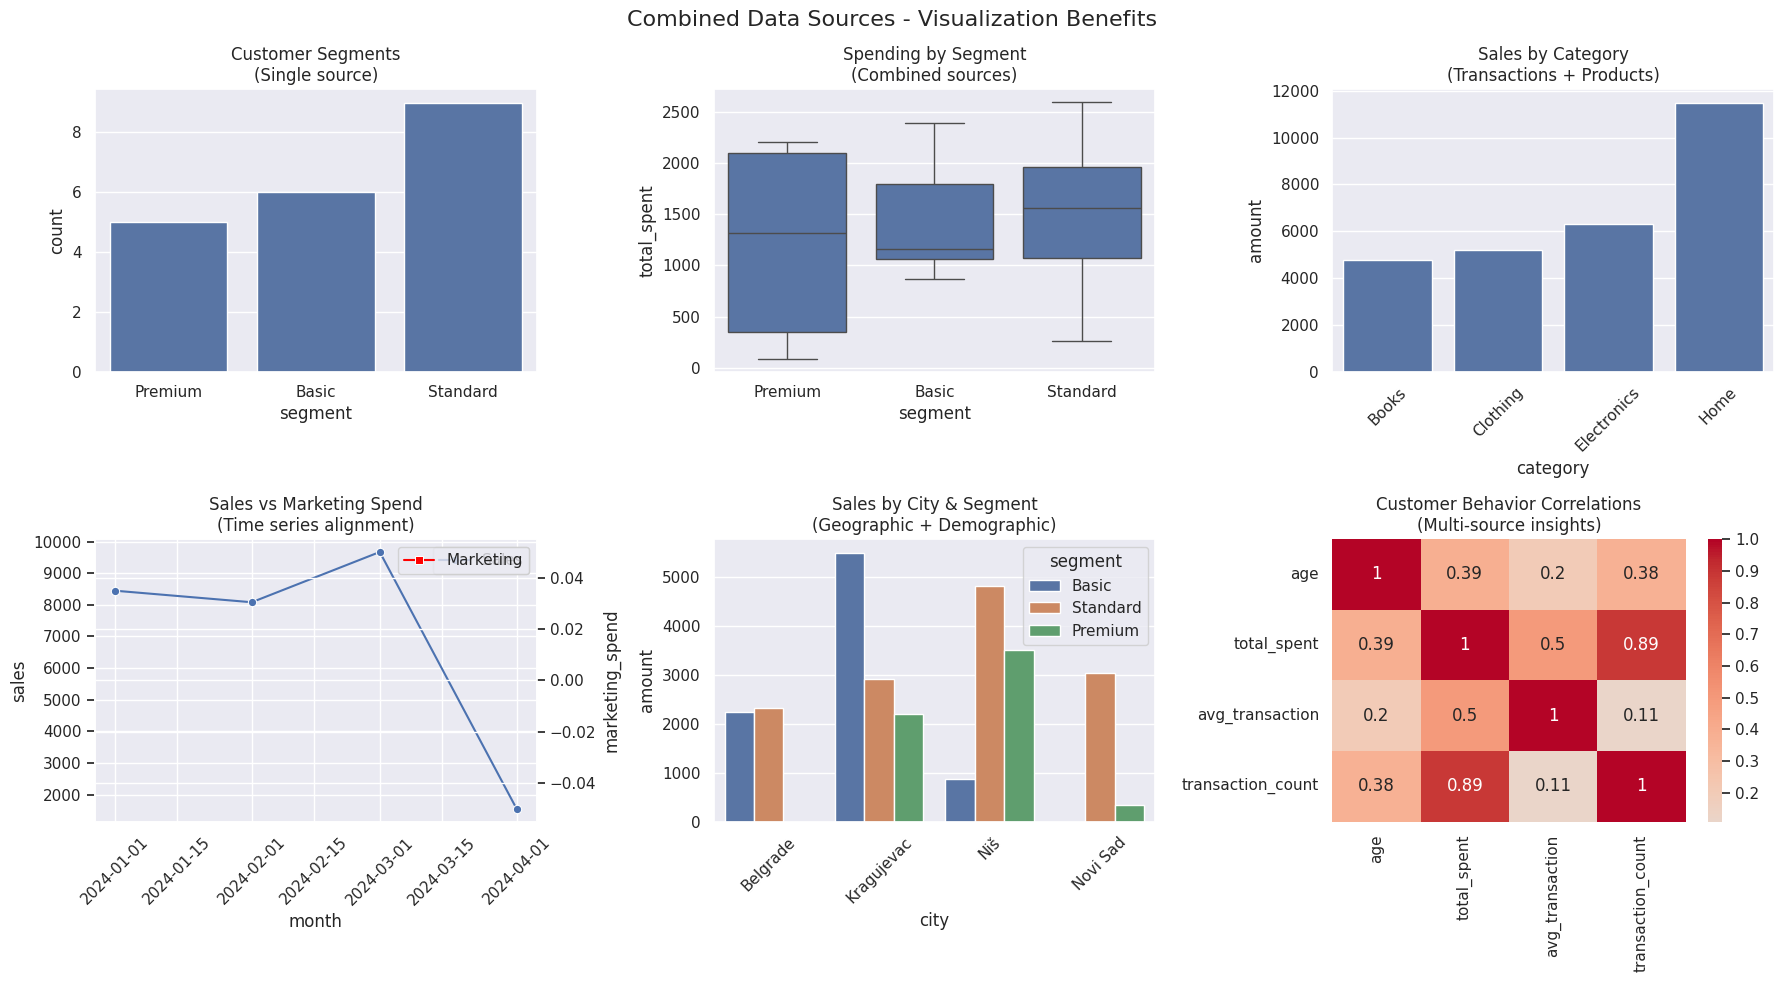


🔍 DATA QUALITY AFTER JOINING:
Missing values po kolonama:
  digital_spend: 100 (100.0%)
  traditional_spend: 100 (100.0%)

Key statistics:
Unique customers: 20
Unique products: 15
Date range: 2024-01-01 00:00:00 to 2024-04-09 00:00:00
Total revenue: $27,756.77

💼 BUSINESS INSIGHTS iz COMBINED DATA:

Customer Lifetime Value by Segment:
          count     mean       sum
segment                           
Basic         6  1435.95   8615.69
Premium       5  1209.46   6047.30
Standard      9  1454.86  13093.78

Top 5 Products:
       category product_name  total_sales  transactions  unique_customers
9          Home    Product_A      4174.81            14                 7
10         Home    Product_G      2682.27             8                 7
7   Electronics    Product_K      2479.85             8                 7
0         Books    Product_D      2418.36             9                 7
1         Books    Product_F      2334.53             7                 6

✅ DATA COMBINING BENEFITS

In [18]:
# SIMULACIJA REALNIH DATA SOURCES
np.random.seed(42)

# 1. CUSTOMER DATABASE
customers = pd.DataFrame({
    'customer_id': [f'C{i:03d}' for i in range(1, 21)],
    'age': np.random.randint(18, 70, 20),
    'gender': np.random.choice(['M', 'F'], 20),
    'city': np.random.choice(['Belgrade', 'Novi Sad', 'Niš', 'Kragujevac'], 20),
    'segment': np.random.choice(['Premium', 'Standard', 'Basic'], 20, p=[0.2, 0.5, 0.3])
})

# 2. TRANSACTIONS DATABASE  
transactions = pd.DataFrame({
    'transaction_id': [f'T{i:05d}' for i in range(1, 101)],
    'customer_id': np.random.choice(customers['customer_id'], 100),
    'product_id': [f'P{i:03d}' for i in np.random.randint(1, 16, 100)],
    'amount': np.random.uniform(10, 500, 100).round(2),
    'date': pd.date_range('2024-01-01', periods=100, freq='D')[:100]
})

# 3. PRODUCTS DATABASE
products = pd.DataFrame({
    'product_id': [f'P{i:03d}' for i in range(1, 16)],
    'product_name': [f'Product_{chr(65+i)}' for i in range(15)],
    'category': np.random.choice(['Electronics', 'Clothing', 'Books', 'Home'], 15),
    'price': np.random.uniform(20, 800, 15).round(2),
    'supplier': np.random.choice(['Supplier_X', 'Supplier_Y', 'Supplier_Z'], 15)
})

# 4. MARKETING SPEND (external data)
marketing_spend = pd.DataFrame({
    'month': pd.date_range('2024-01-01', periods=12, freq='M'),
    'digital_spend': np.random.uniform(1000, 5000, 12).round(2),
    'traditional_spend': np.random.uniform(500, 3000, 12).round(2),
    'city': np.random.choice(['Belgrade', 'Novi Sad', 'Niš', 'Kragujevac'], 12)
})

print("🗃️ MULTIPLE DATA SOURCES:")
print(f"Customers: {customers.shape}")
print(f"Transactions: {transactions.shape}")
print(f"Products: {products.shape}")
print(f"Marketing: {marketing_spend.shape}")

print(f"\nSample data:")
print("CUSTOMERS:")
print(customers.head(3))
print("\nTRANSACTIONS:")
print(transactions.head(3))

# MERGE OPERATIONS
print(f"\n🔗 MERGE OPERATIONS:")

# 1. Inner Join - samo matching records
transactions_with_customers = pd.merge(
    transactions, 
    customers, 
    on='customer_id', 
    how='inner'
)

print(f"1. Inner join (transactions + customers): {transactions_with_customers.shape}")
print(f"   Original transactions: {transactions.shape[0]}")
print(f"   Customers matched: {transactions_with_customers['customer_id'].nunique()}")

# 2. Left Join - sve transactions, dodaj customer info gde moguće  
transactions_left = pd.merge(
    transactions,
    customers,
    on='customer_id',
    how='left'
)

print(f"2. Left join: {transactions_left.shape}")
print(f"   Missing customer info: {transactions_left['age'].isna().sum()} records")

# 3. Multiple joins - chain several merges
full_dataset = (transactions
    .merge(customers, on='customer_id', how='left')
    .merge(products, on='product_id', how='left')
)

print(f"3. Multiple joins: {full_dataset.shape}")
print(f"   Columns: {list(full_dataset.columns)}")

# 4. Complex join sa date alignment
# Dodaj month kolonu u full_dataset umesto samo u transactions
full_dataset['month'] = full_dataset['date'].dt.to_period('M').dt.to_timestamp()

# Merge sa marketing spend po city i month
full_with_marketing = pd.merge(
    full_dataset,
    marketing_spend,
    on=['city', 'month'],
    how='left'
)

print(f"4. Complex join (sa dates): {full_with_marketing.shape}")
print(f"   Marketing data matches: {full_with_marketing['digital_spend'].notna().sum()}")

# CONCAT OPERATIONS
print(f"\n🔗 CONCAT OPERATIONS:")

# Simulacija data iz različitih perioda
q1_sales = full_dataset[full_dataset['date'] < '2024-04-01'].copy()
q2_sales = full_dataset[full_dataset['date'] >= '2024-04-01'].copy()

print(f"Q1 sales: {q1_sales.shape}")
print(f"Q2 sales: {q2_sales.shape}")

# Vertical concatenation
all_sales = pd.concat([q1_sales, q2_sales], ignore_index=True)
print(f"Combined sales: {all_sales.shape}")

# Horizontal concatenation - dodavanje novih kolona
customer_summary = customers.groupby('customer_id').agg({
    'age': 'first',
    'segment': 'first'
}).reset_index()

transaction_summary = transactions.groupby('customer_id').agg({
    'amount': ['sum', 'mean', 'count']
}).round(2)
transaction_summary.columns = ['total_spent', 'avg_transaction', 'transaction_count']
transaction_summary = transaction_summary.reset_index()

# Horizontal concat different summaries
customer_profiles = pd.merge(customer_summary, transaction_summary, on='customer_id', how='outer')

print(f"\nCustomer profiles: {customer_profiles.shape}")
print(customer_profiles.head(3))

# Vizualizacija combined datasets
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Combined Data Sources - Visualization Benefits', fontsize=16)

# 1. Customer demographics only
sns.countplot(data=customers, x='segment', ax=axes[0,0])
axes[0,0].set_title('Customer Segments\n(Single source)')

# 2. Enhanced sa transaction data
sns.boxplot(data=customer_profiles, x='segment', y='total_spent', ax=axes[0,1])
axes[0,1].set_title('Spending by Segment\n(Combined sources)')

# 3. Product analysis sa categories
product_sales = full_dataset.groupby('category')['amount'].sum().reset_index()
sns.barplot(data=product_sales, x='category', y='amount', ax=axes[0,2])
axes[0,2].set_title('Sales by Category\n(Transactions + Products)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Time series sa marketing impact
monthly_analysis = full_with_marketing.groupby('month').agg({
    'amount': 'sum',
    'digital_spend': 'first',
    'transaction_id': 'count'
}).reset_index()
monthly_analysis.columns = ['month', 'sales', 'marketing_spend', 'transaction_count']

sns.lineplot(data=monthly_analysis, x='month', y='sales', marker='o', ax=axes[1,0], label='Sales')
ax2 = axes[1,0].twinx()
sns.lineplot(data=monthly_analysis, x='month', y='marketing_spend', marker='s', ax=ax2, color='red', label='Marketing')
axes[1,0].set_title('Sales vs Marketing Spend\n(Time series alignment)')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Geographic analysis
city_analysis = full_dataset.groupby(['city', 'segment'])['amount'].sum().reset_index()
sns.barplot(data=city_analysis, x='city', y='amount', hue='segment', ax=axes[1,1])
axes[1,1].set_title('Sales by City & Segment\n(Geographic + Demographic)')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Complex relationship analysis
correlation_data = customer_profiles[['age', 'total_spent', 'avg_transaction', 'transaction_count']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, ax=axes[1,2])
axes[1,2].set_title('Customer Behavior Correlations\n(Multi-source insights)')

plt.tight_layout()
plt.show()

# DATA QUALITY ANALYSIS posle joining
print(f"\n🔍 DATA QUALITY AFTER JOINING:")

print(f"Missing values po kolonama:")
missing_summary = full_with_marketing.isnull().sum()
for col, missing in missing_summary.items():
    if missing > 0:
        missing_pct = (missing / len(full_with_marketing)) * 100
        print(f"  {col}: {missing} ({missing_pct:.1f}%)")

# Key statistics
print(f"\nKey statistics:")
print(f"Unique customers: {full_dataset['customer_id'].nunique()}")
print(f"Unique products: {full_dataset['product_id'].nunique()}")
print(f"Date range: {full_dataset['date'].min()} to {full_dataset['date'].max()}")
print(f"Total revenue: ${full_dataset['amount'].sum():,.2f}")

# Business insights enabled by data combination
print(f"\n💼 BUSINESS INSIGHTS iz COMBINED DATA:")

# Customer lifetime value by segment
clv_by_segment = customer_profiles.groupby('segment')['total_spent'].agg(['count', 'mean', 'sum'])
print(f"\nCustomer Lifetime Value by Segment:")
print(clv_by_segment.round(2))

# Product performance
product_performance = full_dataset.groupby(['category', 'product_name']).agg({
    'amount': ['sum', 'count'],
    'customer_id': 'nunique'
}).round(2)
product_performance.columns = ['total_sales', 'transactions', 'unique_customers']
top_products = product_performance.reset_index().nlargest(5, 'total_sales')
print(f"\nTop 5 Products:")
print(top_products)

print(f"\n✅ DATA COMBINING BENEFITS:")
print(f"- Rich customer profiles kombinovanje demographics + behavior")
print(f"- Product insights sa customer segments")
print(f"- Time series analysis sa external factors")
print(f"- Geographic analysis sa marketing alignment") 
print(f"- Cross-functional business insights")

print(f"\n⚠️ COMMON PITFALLS:")
print(f"- Key mismatches (case sensitivity, formatting)")
print(f"- Date alignment issues")
print(f"- Duplicate records after joining")
print(f"- Memory issues sa large datasets")
print(f"- Missing value handling strategy")

## 6. Zaključak

U ovom notebook-u smo naučili **ključne strukture podataka** koje Seaborn koristi za kreiranje vizualizacija.

### **Što smo pokrivali:**

1. **📊 Pandas DataFrame**
   - Najčešći i najprikladniji format za Seaborn
   - Automatic label detection i data type handling
   - Built-in support za categorical, datetime, i mixed data

2. **📈 Long vs Wide Format**
   - **Long format (Tidy data)** - Seaborn preferira
   - **Wide format** - spreadsheet style, teži za Seaborn
   - Kada koristiti koji format

3. **🎯 Dictionary of Arrays**
   - Brža alternativa za small datasets
   - Direct NumPy array support
   - Good za prototyping, limited za complex operations

4. **🔄 Format Conversions**
   - `melt()` - wide to long (ključno za Seaborn)
   - `pivot()` - long to wide (za heatmaps)
   - `stack()/unstack()` - za hierarchical data

5. **🏗️ Combining Data Sources**
   - `merge()` - SQL-style joins
   - `concat()` - stacking datasets
   - Real-world data integration strategies

### **Key Takeaways:**

| **Data Format** | **Best For** | **Seaborn Compatibility** | **Use Case** |
|-----------------|--------------|----------------------------|--------------|
| **DataFrame (Long)** | ⭐⭐⭐⭐⭐ | Excellent | Production visualizations |
| **DataFrame (Wide)** | ⭐⭐ | Poor (needs melt) | Data storage, heatmaps |
| **Dict of Arrays** | ⭐⭐⭐ | Good | Quick prototyping |
| **Combined Sources** | ⭐⭐⭐⭐ | Excellent (after merge) | Business intelligence |

### **Best Practices:**

1. **🎯 Prioritas Long Format**
   - Uvek pokušaj konvertovati u long format za Seaborn
   - Koristi `melt()` za transformation

2. **📋 Plan Your Data Structure**
   - Razmisli o final visualization pre data prep
   - Identify key variables za `x`, `y`, `hue`, `style`

3. **🔧 Validate After Transformations**
   - Provjeri data types posle `melt()` i `merge()`
   - Handle missing values appropriately

4. **⚡ Performance Considerations**
   - Dictionary format za small, simple data
   - DataFrame za complex operations
   - Pre-aggregate large datasets

### **Praktični workflow:**

```python
# 1. Load raw data (often wide format)
df_raw = pd.read_csv('data.csv')

# 2. Convert to long format
df_long = df_raw.melt(id_vars=['id'], 
                      var_name='category', 
                      value_name='value')

# 3. Add metadata if needed
df_enhanced = df_long.merge(metadata, on='id')

# 4. Visualize sa Seaborn
sns.lineplot(data=df_enhanced, x='category', y='value', hue='group')
```

### **Sledeći koraci:**

Sada kada razumeš **data structures**, možeš da:
- Efikasno pripremiš podatke za any Seaborn visualization
- Kombinuješ multiple data sources
- Optimizuješ data format za performance
- Kreiraš complex, multi-dimensional analyses

---

**Napomena**: Ova znanja o **data structures** su **foundation** za sve Seaborn vizualizacije. Invest time u razumevanje ovih koncepata - to će se isplatiti kroz ceo seminarski rad!